# Objective

In this project we will try to predict car prices using its attributes

Dataset | <a href="https://archive.ics.uci.edu/ml/datasets/automobile">Automobile Data Set</a>

Attribute | Attribute Range
-- | --
symboling | -3, -2, -1, 0, 1, 2, 3.
normalized-losses | continuous from 65 to 256.
make  |
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo
fuel-type| diesel, gas.
aspiration| std, turbo.
num-of-doors| four, two.
body-style| hardtop, wagon, sedan, hatchback, convertible.
drive-wheels| 4wd, fwd, rwd.
engine-location| front, rear.
wheel-base| continuous from 86.6 120.9.
length| continuous from 141.1 to 208.1.
width| continuous from 60.3 to 72.3.
height| continuous from 47.8 to 59.8.
curb-weight| continuous from 1488 to 4066.
engine-type| dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
num-of-cylinders| eight, five, four, six, three, twelve, two.
engine-size| continuous from 61 to 326.
fuel-system| 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
bore| continuous from 2.54 to 3.94.
stroke| continuous from 2.07 to 4.17.
compression-ratio| continuous from 7 to 23.
horsepower| continuous from 48 to 288.
peak-rpm| continuous from 4150 to 6600.
city-mpg| continuous from 13 to 49.
highway-mpg| continuous from 16 to 54.
price| continuous from 5118 to 45400.

# Loading the dataset

In [354]:
import pandas as pd
cars = pd.read_csv('imports-85.data')
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [355]:
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


# Data Cleaning

* We could see that the column names are coming from the first row of the data . So lets manually rename the columns . The column names are available in the dataset source

In [356]:
len(cars.columns)

26

In [357]:
colnames = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 
            'city-mpg', 'highway-mpg', 'price']

cars.columns = colnames

In [358]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


* The normalized-losses column has '?'. We could replace the '?' to np.nan

In [359]:
import numpy as np
cars = cars.replace("?",np.nan)

In [360]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       202 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [361]:

to_drop = ["symboling", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "engine-type", "num-of-cylinders", "fuel-system"]


In [362]:
cars[to_drop]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
2,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
4,2,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...,...
199,-1,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
200,-1,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
201,-1,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
202,-1,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [363]:

cars = cars.drop(to_drop, axis=1)

In [364]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    object 
 1   wheel-base         204 non-null    float64
 2   length             204 non-null    float64
 3   width              204 non-null    float64
 4   height             204 non-null    float64
 5   curb-weight        204 non-null    int64  
 6   engine-size        204 non-null    int64  
 7   bore               200 non-null    object 
 8   stroke             200 non-null    object 
 9   compression-rate   204 non-null    float64
 10  horsepower         202 non-null    object 
 11  peak-rpm           202 non-null    object 
 12  city-mpg           204 non-null    int64  
 13  highway-mpg        204 non-null    int64  
 14  price              200 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.0+ KB


* There are 204 entries
* normalized-losses have 164/204 as non na values (rows could be dropped)
* horsepower and peak-rpm has 202-204 as non na values (rows could be dropped)
* bore,stroke,price has 200-204 as non na values


In [365]:
norm_losses_mean = cars[~(cars['normalized-losses'].isnull())]['normalized-losses'].astype(float).mean()
cars['normalized-losses'] = cars['normalized-losses'].fillna(norm_losses_mean)


In [366]:
curb_weight_mean = cars[~(cars['curb-weight'].isnull())]['curb-weight'].astype(float).mean()
cars['curb-weight'] = cars['curb-weight'].fillna(curb_weight_mean)

In [367]:
peak_rpm_mean = cars[~(cars['peak-rpm'].isnull())]['peak-rpm'].astype(float).mean()
cars['peak-rpm'] = cars['peak-rpm'].fillna(peak_rpm_mean)

In [368]:
horsepower_mean = cars[~(cars['horsepower'].isnull())]['horsepower'].astype(float).mean()
cars['horsepower'] = cars['horsepower'].fillna(horsepower_mean)

In [369]:
bore_mean = cars[~(cars['bore'].isnull())]['bore'].astype(float).mean()
cars['bore'] = cars['bore'].fillna(bore_mean)

In [370]:
stroke_mean = cars[~(cars['stroke'].isnull())]['stroke'].astype(float).mean()
cars['stroke'] = cars['stroke'].fillna(stroke_mean)

In [371]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  204 non-null    object 
 1   wheel-base         204 non-null    float64
 2   length             204 non-null    float64
 3   width              204 non-null    float64
 4   height             204 non-null    float64
 5   curb-weight        204 non-null    int64  
 6   engine-size        204 non-null    int64  
 7   bore               204 non-null    object 
 8   stroke             204 non-null    object 
 9   compression-rate   204 non-null    float64
 10  horsepower         204 non-null    object 
 11  peak-rpm           204 non-null    object 
 12  city-mpg           204 non-null    int64  
 13  highway-mpg        204 non-null    int64  
 14  price              200 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.0+ KB


In [372]:
# Since price is label and there are only 4 rows we could drop the rows 

cars = cars.dropna(subset=['price'])

In [373]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 203
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  200 non-null    object 
 1   wheel-base         200 non-null    float64
 2   length             200 non-null    float64
 3   width              200 non-null    float64
 4   height             200 non-null    float64
 5   curb-weight        200 non-null    int64  
 6   engine-size        200 non-null    int64  
 7   bore               200 non-null    object 
 8   stroke             200 non-null    object 
 9   compression-rate   200 non-null    float64
 10  horsepower         200 non-null    object 
 11  peak-rpm           200 non-null    object 
 12  city-mpg           200 non-null    int64  
 13  highway-mpg        200 non-null    int64  
 14  price              200 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 25.0+ KB


In [374]:
cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
4,122.0,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250


* Now we have only 2 columns (bore,stroke) with na values
* We can remove those rows next

In [375]:
cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

* All the 200 data points are having no na values

# Univariate Analysis

* Lets keep all the columns for features except the price column
* Lets keep only the price column as the label

In [376]:
cars_features = cars.drop(['price'],axis=1)
cars_label = cars[['price']]

In [377]:
cars_features = cars_features.astype(float)
cars_label = cars_label.astype(float)

In [378]:
cars_label.head()

,price
0,16500.0
1,16500.0
2,13950.0
3,17450.0
4,15250.0


In [379]:
#Returns the root mean squared error using KNN
def knn_train_test(features, target_col, df):
    #randomize sets
    np.random.seed(1)

    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    thres = int(len(randomed_df)*0.7)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:thres]
    test_df = randomed_df.iloc[thres:]
    
    #training
    knn = KNeighborsRegressor()
    knn.fit(train_df[[features]], train_df[[target_col]])
    
    #test
    predictions = knn.predict(test_df[[features]])
    mse = mean_squared_error(test_df[[target_col]], predictions)
    rmse = mse**0.5
    return rmse

In [380]:
# Normalizing the data (Fit the data in the range of 0 and 1)
normalized_cars = (cars_features-cars_features.mean())/(cars_features.max()-cars_features.min())
normalized_cars['price'] = cars_label

In [381]:
normalized_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-0.298776,-0.081015,-0.153675,-0.415958,-0.002989,0.011849,0.100014,-0.276103,-0.073131,0.035667,-0.048269,-0.116667,-0.097500,16500.0
1,0.000000,-0.126764,-0.045194,-0.034017,-0.115958,0.103683,0.094868,-0.464272,0.100088,-0.073131,0.236602,-0.048269,-0.172222,-0.123816,16500.0
2,0.219895,0.027755,0.035403,0.025812,0.042375,-0.084835,-0.067396,-0.099986,0.066754,-0.010631,-0.006389,0.155812,-0.033333,-0.018553,13950.0
3,0.219895,0.016093,0.035403,0.042906,0.042375,0.104071,0.034491,-0.099986,0.066754,-0.135631,0.054359,0.155812,-0.200000,-0.229079,17450.0
4,0.000000,0.027755,0.045851,0.034359,-0.057625,-0.018893,0.034491,-0.099986,0.066754,-0.104381,0.030994,0.155812,-0.172222,-0.150132,15250.0


In [382]:
features = normalized_cars.columns.drop('price')
rmse = {}
for item in features:
    rmse[item] = knn_train_test(item, 'price', normalized_cars)

results = pd.Series(rmse)
results.sort_values()

engine-size          2980.029243
city-mpg             3122.141296
curb-weight          3203.029272
highway-mpg          3443.083949
width                3511.777595
length               4530.148545
horsepower           5114.600181
wheel-base           5716.060030
bore                 6485.234645
normalized-losses    6629.533760
compression-rate     6910.088248
stroke               6950.655717
peak-rpm             7103.722273
height               7273.188958
dtype: float64

In [383]:
def knn_train_test2(features, target_col, df, k_values):
    #randomize sets
    np.random.seed(1)
    from sklearn.neighbors import KNeighborsRegressor

    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    thres = int(len(randomed_df)*0.7)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:thres]
    test_df = randomed_df.iloc[thres:]
    
    k_rmse = {}
    #training
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[features]], train_df[[target_col]])
        
        #test
        predictions = knn.predict(test_df[[features]])
        mse = mean_squared_error(test_df[[target_col]], predictions)
        rmse = mse**0.5
        k_rmse[k] = rmse
    return k_rmse

In [384]:
#input k parameter as a list, use function to return a dictionary of dictionaries

k = [1, 3, 5, 7, 9]
features = normalized_cars.columns.drop('price')
feature_k_rmse = {}

for item in features:
    feature_k_rmse[item] = knn_train_test2(item, 'price', normalized_cars, k)
    
feature_k_rmse

{'normalized-losses': {1: 8304.417271348224,
  3: 6302.7631295065075,
  5: 6629.533760378628,
  7: 6731.658251801528,
  9: 6719.842120625432},
 'wheel-base': {1: 4926.868378256788,
  3: 5756.432622630868,
  5: 5716.060030300591,
  7: 5398.510057143066,
  9: 5577.13483266897},
 'length': {1: 5396.112429332807,
  3: 5039.1651715265225,
  5: 4530.148545246612,
  7: 4631.662245030483,
  9: 4799.169590141431},
 'width': {1: 3022.8002938776267,
  3: 3654.408481039893,
  5: 3511.7775945143985,
  7: 3263.720967714924,
  9: 3044.752528747923},
 'height': {1: 10404.260648888032,
  3: 7530.863600445736,
  5: 7273.18895785519,
  7: 7023.488668983053,
  9: 7019.054477039346},
 'curb-weight': {1: 3451.085290648919,
  3: 3523.6555571146832,
  5: 3203.0292724232168,
  7: 2602.306145877296,
  9: 2697.3792617441177},
 'engine-size': {1: 3414.1167525437672,
  3: 2717.3804720041744,
  5: 2980.0292428095404,
  7: 3004.4466532419697,
  9: 2985.321399451773},
 'bore': {1: 11689.69164335256,
  3: 6864.0391771

normalized-losses
average_rmse: 6937.642906732062
wheel-base
average_rmse: 5475.001184200057
length
average_rmse: 4879.251596255571
width
average_rmse: 3299.4919731789532
height
average_rmse: 7850.171270642271
curb-weight
average_rmse: 3095.4911055616462
engine-size
average_rmse: 3020.2589040102453
bore
average_rmse: 7863.166425281734
stroke
average_rmse: 7130.86029228263
compression-rate
average_rmse: 7458.734133171104
horsepower
average_rmse: 4791.196635145012
peak-rpm
average_rmse: 7665.550961307938
city-mpg
average_rmse: 3728.7385148658313
highway-mpg
average_rmse: 3464.3555617494553


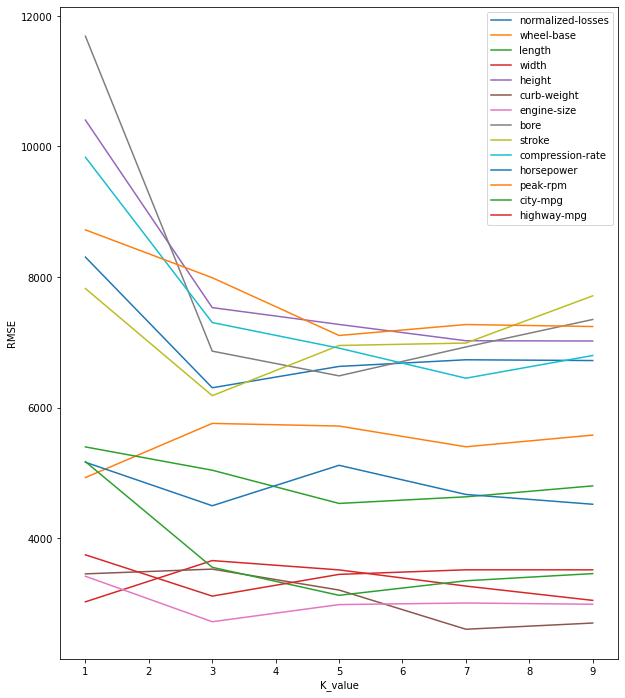

In [385]:
best_features = {}
plt.figure(figsize=(10, 12))

for key, value in feature_k_rmse.items():
    x = list(value.keys())
    y = list(value.values())
    
    order = np.argsort(x)
    x_ordered = np.array(x)[order]
    y_ordered = np.array(y)[order]
    print(key)
    print('average_rmse: '+str(np.mean(y)))
    best_features[key] = np.mean(y)

    plt.plot(x_ordered, y_ordered, label=key)
    plt.xlabel("K_value")
    plt.ylabel("RMSE")
plt.legend()
plt.show()

In [386]:
best_features.keys()

dict_keys(['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'])

In [387]:
best_features.values()

dict_values([6937.642906732062, 5475.001184200057, 4879.251596255571, 3299.4919731789532, 7850.171270642271, 3095.4911055616462, 3020.2589040102453, 7863.166425281734, 7130.86029228263, 7458.734133171104, 4791.196635145012, 7665.550961307938, 3728.7385148658313, 3464.3555617494553])

In [388]:
df = pd.DataFrame({
    'features':best_features.keys(),
    'rmse' : best_features.values()
})
df.sort_values(by='rmse')

,features,rmse
6,engine-size,3020.258904
5,curb-weight,3095.491106
3,width,3299.491973
13,highway-mpg,3464.355562
12,city-mpg,3728.738515
10,horsepower,4791.196635
2,length,4879.251596
1,wheel-base,5475.001184
0,normalized-losses,6937.642907
8,stroke,7130.860292


In [389]:
sorted_features_list = df.sort_values(by='rmse')['features'].to_list()

# Multivariate Analysis

In [390]:

def knn_train_test3(features, target_col, df):
    #randomize sets
    np.random.seed(0)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)*0.7)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    #training
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(train_df[features], train_df[[target_col]])
    #test
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df[[target_col]], predictions)
    rmse = mse**0.5
    return rmse

In [391]:
k_rmse_features ={}

best_two_features = sorted_features_list[0:2]
best_three_features = sorted_features_list[0:3]
best_four_features = sorted_features_list[0:4]
best_five_features = sorted_features_list[0:5]


k_rmse_features["best_two_rmse"]  = knn_train_test3(best_two_features, 'price', normalized_cars)
k_rmse_features["best_three_rmse"] = knn_train_test3(best_three_features, 'price', normalized_cars)
k_rmse_features["best_four_rmse"] = knn_train_test3(best_four_features, 'price', normalized_cars)
k_rmse_features["best_five_rmse"] = knn_train_test3(best_five_features, 'price', normalized_cars)

In [392]:
k_rmse_features

{'best_two_rmse': 2742.4645079441475,
 'best_three_rmse': 2610.176249987728,
 'best_four_rmse': 2472.2049518597764,
 'best_five_rmse': 2476.9712257782353}

* We could see that the lowest rmse is for 5 features

# Hyperparameter tuning (K)

In [393]:
def knn_train_test4(features, target_col, df, k_values):
    #randomize sets
    np.random.seed(0)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)*0.7)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    k_rmse = {}
    #training
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[features], train_df[[target_col]])
        #test
        predictions = knn.predict(test_df[features])
        mse = mean_squared_error(test_df[[target_col]], predictions)
        rmse = mse**0.5
        k_rmse[k] = rmse
    return k_rmse

In [394]:
#input k parameter as a list, use function to return a dictionary of dictionaries
k = list(range(1,25))
features = [best_two_features,best_three_features, best_four_features, best_five_features]
feature_k_rmse2 = {}
feature_k_rmse2["best_two_features"] = knn_train_test4(best_two_features, 'price', normalized_cars, k)
feature_k_rmse2["best_three_features"] = knn_train_test4(best_three_features, 'price', normalized_cars, k)
feature_k_rmse2["best_four_features"] = knn_train_test4(best_four_features, 'price', normalized_cars, k)
feature_k_rmse2["best_five_features"] = knn_train_test4(best_five_features, 'price', normalized_cars, k)

In [395]:
feature_k_rmse2

{'best_two_features': {1: 2746.3990969995602,
  2: 3151.115528004858,
  3: 2922.510691929876,
  4: 2832.4347138695593,
  5: 2742.4645079441475,
  6: 2789.4954790746265,
  7: 2724.161930853268,
  8: 2759.4641171906005,
  9: 2853.6119610916962,
  10: 2814.638613362883,
  11: 2923.687185079544,
  12: 3145.889543997438,
  13: 3279.045658792472,
  14: 3397.0488964588035,
  15: 3512.376095276055,
  16: 3488.334987090755,
  17: 3551.1262654341817,
  18: 3462.711080290391,
  19: 3478.0875074278892,
  20: 3514.5568153040294,
  21: 3558.4713506400158,
  22: 3659.1149955258434,
  23: 3662.317381766483,
  24: 3683.9887226317633},
 'best_three_features': {1: 2157.26987185192,
  2: 2270.308792323194,
  3: 2476.269939811655,
  4: 2547.5215304127787,
  5: 2610.176249987728,
  6: 2572.759645231095,
  7: 2649.773916039338,
  8: 2798.827043332543,
  9: 2837.1850122297983,
  10: 2791.376500731016,
  11: 2751.8215079666757,
  12: 2855.9212848978186,
  13: 2897.078373188146,
  14: 2984.6651923698605,
  15: 

# Conclusion

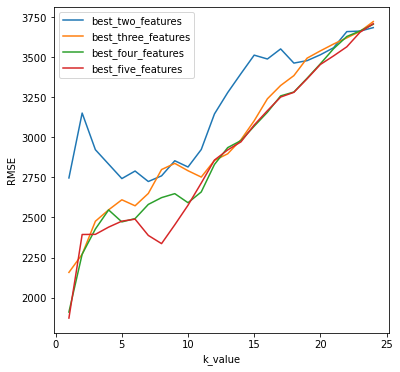

In [396]:
plt.figure(figsize=(6, 6))

for key, value in feature_k_rmse2.items():
    
    x = list(value.keys())
    y = list(value.values())
    plt.plot(x, y, label=key)
    plt.xlabel("k_value")
    plt.ylabel("RMSE")
    
plt.legend()
plt.show()

* Best model would be with five features and k value 8 has the lowest RMSE 2336.82